# Installation des packages

In [1]:
!pip3 install linearmodels
import pandas as pd
import numpy as np
import linearmodels
from linearmodels.iv import IV2SLS

# Importation des données

In [2]:
# On prend le dataset esge avec toutes les dates
esg_data = pd.read_csv('ESG_E.csv')
esg_data.head()

/tmp/ipykernel_11358/2631595158.py:2: DtypeWarning: Columns (1,2,3,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  esg_data = pd.read_csv('ESG_E.csv')


,idEntreprise,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,...,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12,2023-01,2023-02,2023-03,2023-04
0,1,"44,375","44,08888889","44,08627778","44,08371889","44,08121118","44,07875362","44,07634522","43,7962072","44,21611639",...,"60,4206142","57,30323449","56,92830124","56,94691093","57,36955728","56,37531796","55,29196737","55,42993636","55,71251352","56,08985466"
1,2,"40,90277778","40,63055556","40,64155556","40,65233556","40,66289996","40,67325307","40,40562134","40,42112002","40,43630873",...,"73,44261856","73,25716506","72,94483216","72,55042001","73,64794086","74,07164631","74,00185758","74,20052537","74,09938254","74,07640744"
2,3,"49,51388889","49,51388889","49,51388889","49,51388889","49,51388889","50,06944444","50,05833333","50,04744444","50,31455111",...,"74,65986533","74,65596497","74,96295978","75,13466786","75,37141777","75,02208314","75,16479506","75,54714096","75,36927013","75,09739596"
3,4,"38,57638889","38,57638889","38,57638889","38,57638889","38,57638889","38,57638889","38,57638889","38,57638889","38,57638889",...,"60,55539706","60,67762245","60,51962556","60,3647886","60,49082616","62,00323186","62,37427834","62,73790388","62,81647914","62,61570511"
4,5,"37,91666667","38,20833333","35,43861111","35,50206111","36,39757544","34,77517949","34,01856479","32,16597127","32,29487407",...,"53,46184228","53,79463351","53,77218636","53,82112083","54,07152963","54,23695602","55,12772167","55,16972037","54,98915515","54,85916779"


In [3]:
# On prend le score de comm environnemental que l'on a calculé
env_comm_score = pd.read_csv('env_comm_score_articles_forces.csv')
env_comm_score.head()

,Entreprise_Insérée_1,ISIN,environmental_sentiment_score
0,Kirloskar Brothers Ltd,INE732A01036,-0.002137
1,Seer Inc,US81578P1066,0.006726
2,Samsung Life Insurance Co Ltd,KR7032830002,-0.011527
3,Kontoor Brands Inc,US50050N1037,-0.006357
4,Tauron Polska Energia SA,PLTAURN00011,-0.002691


In [4]:
# Nb de lignes avec erreur: 1 sur 13000
covalence_id_firms = pd.read_csv('Universe_Listed_Covalence_31.07.2023_v2_updated.csv',sep=';',on_bad_lines='skip')
covalence_id_firms.head()

,Unnamed: 0,idEntreprise,Company,ISIN,GICS industry group,GICS sub-industry,Headquarters Region,Headquarters Country
0,0,1,Pfizer Inc,US7170811035,"Pharmaceuticals, Biotechnology & Life Sciences",Pharmaceuticals,Americas,United States of America
1,1,2,Merck & Co Inc,US58933Y1055,"Pharmaceuticals, Biotechnology & Life Sciences",Pharmaceuticals,Americas,United States of America
2,2,3,GSK plc,GB0009252882,Unable to resolve all requested identifiers.,Unable to resolve all requested identifiers.,Unable to resolve all requested identifiers.,Unable to resolve all requested identifiers.
3,3,4,Eli Lilly and Co,US5324571083,"Pharmaceuticals, Biotechnology & Life Sciences",Pharmaceuticals,Americas,United States of America
4,4,5,Bayer AG,DE000BAY0017,"Pharmaceuticals, Biotechnology & Life Sciences",Pharmaceuticals,Europe,Germany


In [5]:
covalence_id_firms.to_pickle('covalence_id_firms.pkl')
covalence_id_firms = pd.read_pickle('covalence_id_firms.pkl')
covalence_id_firms.head()

,Unnamed: 0,idEntreprise,Company,ISIN,GICS industry group,GICS sub-industry,Headquarters Region,Headquarters Country
0,0,1,Pfizer Inc,US7170811035,"Pharmaceuticals, Biotechnology & Life Sciences",Pharmaceuticals,Americas,United States of America
1,1,2,Merck & Co Inc,US58933Y1055,"Pharmaceuticals, Biotechnology & Life Sciences",Pharmaceuticals,Americas,United States of America
2,2,3,GSK plc,GB0009252882,Unable to resolve all requested identifiers.,Unable to resolve all requested identifiers.,Unable to resolve all requested identifiers.,Unable to resolve all requested identifiers.
3,3,4,Eli Lilly and Co,US5324571083,"Pharmaceuticals, Biotechnology & Life Sciences",Pharmaceuticals,Americas,United States of America
4,4,5,Bayer AG,DE000BAY0017,"Pharmaceuticals, Biotechnology & Life Sciences",Pharmaceuticals,Europe,Germany


In [6]:
covalence_id_firms = covalence_id_firms.drop(columns=['Unnamed: 0','GICS industry group','GICS sub-industry','Headquarters Region','Headquarters Country'], axis=1)
covalence_id_firms.head()

,idEntreprise,Company,ISIN
0,1,Pfizer Inc,US7170811035
1,2,Merck & Co Inc,US58933Y1055
2,3,GSK plc,GB0009252882
3,4,Eli Lilly and Co,US5324571083
4,5,Bayer AG,DE000BAY0017


In [7]:
# Effectuer une jointure (merge) entre df1 et df2 sur la colonne 'ISIN'
env_comm_score = pd.merge(covalence_id_firms, env_comm_score, on='ISIN', how='inner').drop(columns=['Entreprise_Insérée_1'])

# Afficher les premières lignes du DataFrame fusionné pour vérification
env_comm_score.head()


,idEntreprise,Company,ISIN,environmental_sentiment_score
0,116,General Electric Co,US3696041033,-0.002753
1,1909,Kajima Corp,JP3210200006,0.011874
2,1951,Cigna Corp,US1255231003,-0.003237
3,1968,Aegon NV,NL0000303709,0.014302
4,2035,SSE PLC,GB0007908733,0.005569


On ne garde que le score ESG des entreprises dont on a un score de communication environemental :

In [8]:
# Filtrer les lignes de esg_data en fonction des idEntreprise présents dans merged_df
filtered_esg_data = esg_data[esg_data['idEntreprise'].isin(env_comm_score['idEntreprise'])].reset_index(drop=True)

# Afficher les premières lignes du DataFrame filtré pour vérification
filtered_esg_data.head()

,idEntreprise,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,...,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12,2023-01,2023-02,2023-03,2023-04
0,116,"37,5","36,94444444","36,95555556","37,522","36,68822667","36,14890658","36,17592845","36,20240988","36,22836168",...,"81,3863865","81,38394368","81,39598911","81,22716959","81,26571116","81,87888281","82,00367903","81,81674803","81,72799745","82,99552569"
1,1909,50,50,50,50,50,50,50,50,50,...,"49,22720547","49,17391136","49,12168314","49,07049947","49,02033948","48,97118269","48,92300904","48,87579886","48,82953288","48,78419222"
2,1951,50,50,50,50,50,50,50,50,50,...,"52,60432774","52,54668563","52,49019636","52,43483687","52,38058458","52,32741733","52,27531343","52,77980716","52,71865546","52,6587268"
3,1968,"40,65972222","40,65972222","40,65972222","40,65972222","40,65972222","40,65972222","40,65972222","40,65972222","40,65972222",...,"51,16083164","51,11955945","51,07911271","50,48391934","51,01174096","50,97345058","50,93592601","50,89915194","50,86311334","50,82779552"
4,2035,"40,20833333","40,20833333","40,20833333","40,20833333","40,20833333","40,20833333","40,20833333","40,20833333","40,20833333",...,"61,92168624","62,29297473","62,10128191","61,91342293","61,72932114","61,54890139","61,37209002","61,19881489","61,86233859","61,67925849"


In [36]:
summarized_data = pd.merge(filtered_esg_data, env_comm_score, on='idEntreprise', how='inner')
summarized_data.head()

,idEntreprise,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,...,2022-10,2022-11,2022-12,2023-01,2023-02,2023-03,2023-04,Company,ISIN,environmental_sentiment_score
0,116,"37,5","36,94444444","36,95555556","37,522","36,68822667","36,14890658","36,17592845","36,20240988","36,22836168",...,"81,22716959","81,26571116","81,87888281","82,00367903","81,81674803","81,72799745","82,99552569",General Electric Co,US3696041033,-0.002753
1,1909,50,50,50,50,50,50,50,50,50,...,"49,07049947","49,02033948","48,97118269","48,92300904","48,87579886","48,82953288","48,78419222",Kajima Corp,JP3210200006,0.011874
2,1951,50,50,50,50,50,50,50,50,50,...,"52,43483687","52,38058458","52,32741733","52,27531343","52,77980716","52,71865546","52,6587268",Cigna Corp,US1255231003,-0.003237
3,1968,"40,65972222","40,65972222","40,65972222","40,65972222","40,65972222","40,65972222","40,65972222","40,65972222","40,65972222",...,"50,48391934","51,01174096","50,97345058","50,93592601","50,89915194","50,86311334","50,82779552",Aegon NV,NL0000303709,0.014302
4,2035,"40,20833333","40,20833333","40,20833333","40,20833333","40,20833333","40,20833333","40,20833333","40,20833333","40,20833333",...,"61,91342293","61,72932114","61,54890139","61,37209002","61,19881489","61,86233859","61,67925849",SSE PLC,GB0007908733,0.005569


# Visualisation

## Score environnementale

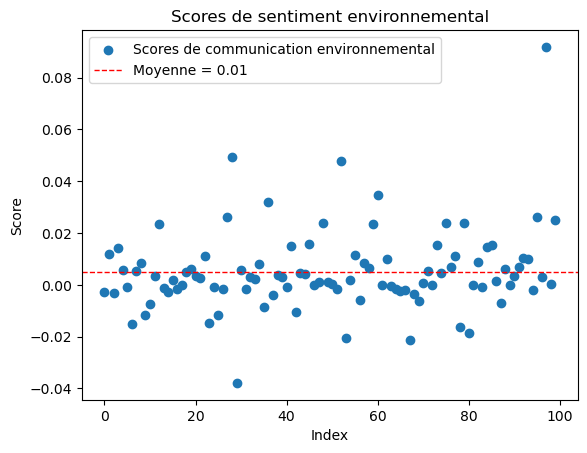

In [9]:
import matplotlib.pyplot as plt

# Données à tracer
x = range(100)
y = env_comm_score['environmental_sentiment_score']

# Tracer le nuage de points
plt.scatter(x, y, label='Scores de communication environnemental')

# Calculer et tracer la moyenne
mean_environmental_sentiment_score = env_comm_score['environmental_sentiment_score'].mean()
plt.axhline(mean_environmental_sentiment_score, color='red', linestyle='dashed', linewidth=1, label=f'Moyenne = {mean_environmental_sentiment_score:.2f}')

# Ajouter des titres et des labels
plt.title('Scores de sentiment environnemental')
plt.xlabel('Index')
plt.ylabel('Score')
plt.legend()

# Afficher le graphique
plt.show()

## Score ESG

In [41]:
visu_esg_company = summarized_data['Company'].iloc[1]
visu_esg_company

'Kajima Corp'

AttributeError: 'str' object has no attribute 'items'

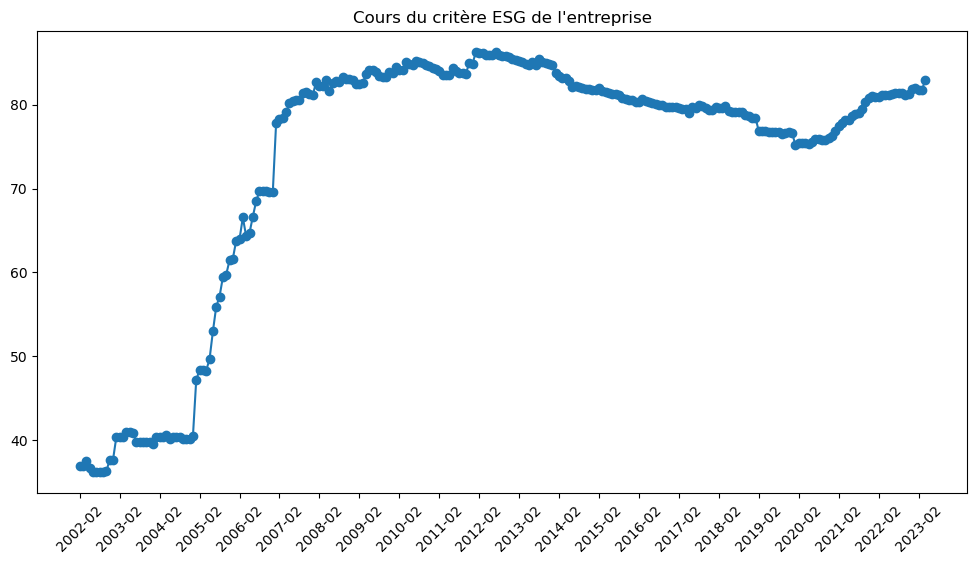

In [40]:

def visu_cours_esg(num_entreprise):

    visu_esg_company = summarized_data['Company'].iloc[num_entreprise]
    visu_esg_data = summarized_data.drop(columns=['idEntreprise','Company','ISIN','environmental_sentiment_score']).iloc[num_entreprise]

    # Convertir les données en float et supprimer l'index 'idEntreprise'
    visu_esg_data = visu_esg_data.str.replace(',', '.').astype(float)

    # Créer le graphe
    plt.figure(figsize=(12, 6))
    plt.plot(visu_esg_data.index[1:], visu_esg_data.values[1:], marker='o', linestyle='-')

    # Ajuster l'affichage des ticks de l'axe des abscisses pour n'afficher qu'une date sur deux
    plt.xticks(rotation=45, ticks=visu_esg_data.index[1::12])  # Affiche une date sur deux

    title = "Cours du critère ESG de l'entreprise " + 
    plt.title(, visu_esg_company)
    plt.xlabel('Date')
    plt.ylabel('Note ESG')
    plt.grid(True)
    plt.tight_layout()  # Ajuste automatiquement le placement des labels pour éviter le chevauchement
    plt.show()

visu_cours_esg(0)



# Manipulation des données

In [ ]:
def get_user_date(start_date, end_date):
    # Prompt the user for a date
    user_date_str = input(f"Enter a date between {start_date} and {end_date} (format YYYY-MM): ")
    
    # Convert user input to a pandas Timestamp
    try:
        user_date = pd.to_datetime(user_date_str, format='%Y-%m')
        start_date = pd.to_datetime(start_date, format='%Y-%m')
        end_date = pd.to_datetime(end_date, format='%Y-%m')

        # Check if the date is within the range
        if start_date <= user_date <= end_date:
            print(f"Selected date: {user_date.strftime('%Y-%m')}")
            return user_date
        else:
            print("Date is out of range. Please try again.")
            return None
    except ValueError:
        print("Invalid date format. Please try again.")
        return None

# Example usage
get_user_date("2002-01", "2023-04")


In [ ]:
# On laisse l'utilisateur choisir une date
date_debut="2002-01"
date_fin="2023-04"
t = get_user_date(date_debut,date_fin)
t = pd.to_datetime(t, format='%Y-%m')
t_minus_1 = (t - pd.DateOffset(months=1)).strftime('%Y-%m')
print(t_minus_1)

# On recupère les scores des etp aux dates t et t-1
col_index = esg_data.columns.get_loc(t)
esge_t = esg_data.iloc[:, col_index]
col_index = esg_data.columns.get_loc(t_minus_1)
esge_t_minus_1 = esg_data.iloc[:, col_index]

In [ ]:
data = {
    'env_comm_score': env_comm_score, 
    'esge': esge_t
    'esge_past': esge_t_minus_1
    'esge_peer': np.random.uniform(0, 100, 100)  # 100 peer environmental scores in the same sector
}

df = pd.DataFrame(data)

# Show the first few rows of the DataFrame
print(df.head())

# Define your variables
dependent = df['env_comm_score']
independent = df[['const']]  # Assuming you've added a constant term to your DataFrame
instrument = df['esge_past']  # Instrumenting esge with its past value
endogenous = df['esge']  # The variable you believe is endogenous

# Setup and run the 2SLS regression
model = IV2SLS(dependent, independent, endogenous, instrument).fit()

# Print model summary
print(model.summary)

# To instrument 'esge' with both its past value and peer scores, you might do:
instrument2 = df[['esge_past', 'esge_peer']]
model2 = IV2SLS(dependent, independent, endogenous, instrument2).fit()
print(model2.summary)
